In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib widget

import numpy as np

from pybkit.trap.tweezers import *
from pybkit.trap.generator import *
from pybkit.amo.laser import *
from pybkit.amo.atom import *

## Generation (SLM + AOD)

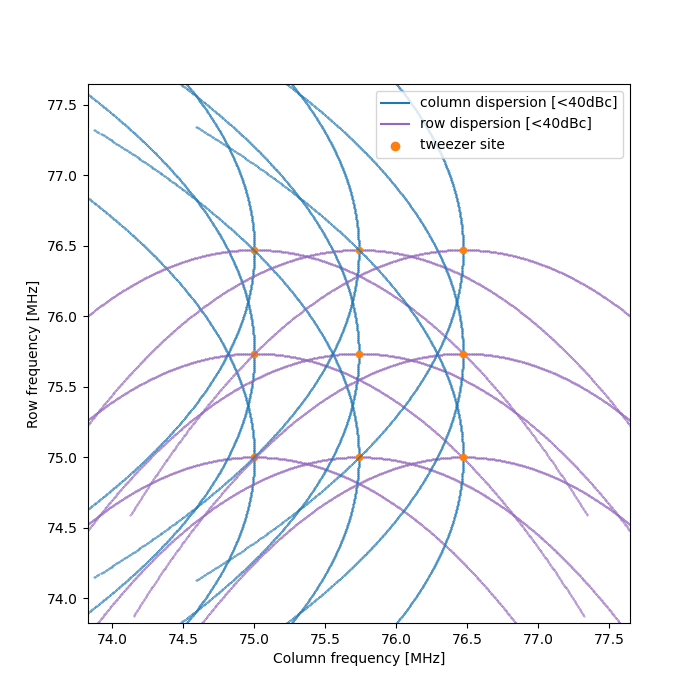

In [22]:
%matplotlib widget

tweezer_laser = GaussianLaser(wavelength=486e-9, linewidth=1e6, power=1e-3, w0=0.5e-6)

spacing = 0.735
row_freqs = np.arange(75, 75 + 3*spacing, spacing)
col_freqs = np.arange(75, 75 + 3*spacing, spacing)
# f_row = [70, 71, 72,  76, 77, 78]
# f_col = [70, 71, 72,  76, 77, 78]
# row_freqs = np.array(f_row).flatten().tolist()
# col_freqs = np.array(f_col).flatten().tolist()
aod = AODDevice(laser=tweezer_laser)
aod_tweezers = aod.generate_tweezers(row_freqs, col_freqs, spacing)


# positions = [[1,1,0], [2,2,0], [3,3,0], [4,4,0]] 
# slm = SLMDevice(laser=tweezer_laser)
# slm_tweezers = slm.generate_tweezers(positions)

# slm_tweezers.plot()
# aod.plot_tweezers_intermodulation(dac_amp=1, weighted=True, decay_distance=8, offset_dB=25, min_dB=-43)
aod.plot_tweezers_phonon_dispersion()
# plt.xlim(65, 95)
# plt.ylim(65, 95)

## Atom Movement

In [ ]:
from pybkit.trap.movement import TweezerMove
from pybkit.trap.trajectory import *

laser = GaussianLaser(
    wavelength=486e-9,
    linewidth=1e6,
    power=5e-3,
    w0=500e-9)
position = [0,0,0]
tweezer = Tweezer(position, laser)

move_dx = 50e-6
move_dt = 400e-6
dxdt2z = 0.025/4/650
trj_func = arb_fifth_poly
trj_kwargs = {'beta': 1.5625}# 1.5625
txyz = np.array([[0,0,0,0], 
                 [move_dt,move_dx,0,0]])
atom = Yb171(B_field=5e-4)
level = atom.get_hyperfine_level('6s6p 3P0 F=0.5 mF=0.5')

move = TweezerMove(tweezer, atom, level, txyz, dxdt2z, trj_func, **trj_kwargs)

# move.traj.plot_position()
# move.plot_potential_along_trajectory()
t = np.linspace(txyz[0,0], txyz[-1,0], int(1e3))
Ei, Ef = move.simulate_ensemble_dynamics(t, T=10e-6, num_samples=200, num_bins=50)

In [ ]:
laser = GaussianLaser(
    wavelength=486e-9,
    linewidth=1e6,
    power=5e-3,
    w0=500e-9)
position = [0,0,0]
tweezer = Tweezer(position, laser)

move_dx = 50e-6
move_dt = 200e-6
dxdt2z = 0.025/4/650
trj_func = arb_fifth_poly
trj_kwargs = {'beta': 1.5625}# 1.5625
txyz = np.array([[0,0,0,0], 
                 [move_dt,move_dx,0,0]])
atom = Yb171(B_field=5e-4)
level = atom.get_hyperfine_level('6s6p 3P0 F=0.5 mF=0.5')

move = TweezerMove(tweezer, atom, level, txyz, dxdt2z, trj_func, **trj_kwargs)

# move.traj.plot_position()
# move.plot_potential_along_trajectory()
t = np.linspace(txyz[0,0], txyz[-1,0], int(1e3))
Ei, Ef = move.simulate_ensemble_dynamics(t, T=10e-6, num_samples=200, num_bins=50)

### Sweep move times

In [ ]:
move_dx = 50e-6
move_dts = np.linspace(130, 205, 50) * 1e-6
dxdt2z = 0.025/4/650
trj_func = arb_fifth_poly
trj_kwargs = {'beta': 1.5625}
atom = Yb171(B_field=5e-4)
level = atom.get_hyperfine_level('6s6p 3P0 F=0.5 mF=0.5')

t = np.linspace(txyz[0,0], txyz[-1,0], int(1e3))

survival_rates = []
for move_dt in move_dts:
    print(move_dt*1e6)
    txyz = np.array([[0,0,0,0], 
                 [move_dt,move_dx,0,0]])
    move = TweezerMove(tweezer, atom, level, txyz, dxdt2z, trj_func, **trj_kwargs)
    Ei, Ef = move.simulate_ensemble_dynamics(t, T=10e-6, num_samples=200, plot=False)
    survival_rate = 1 - (np.sum(Ef >= 0) / Ef.shape[0])
    survival_rates.append(survival_rate)

In [ ]:
plt.figure()
plt.plot(move_dts * 1e6, np.array(survival_rates), 'o-')
plt.xlabel('Move time [us]')

In [ ]:
# move.traj.plot_position()
# move.traj.plot_velocity()
move.plot_potential_along_trajectory()

In [ ]:
t = np.linspace(txyz[0,0], txyz[-1,0] + 20e-6, int(1e4))
p0, v0 = move.sample_maxwell_boltzmann(num_samples=1, T=10e-6, avg_position=[0,0,0])

position, velocity = move.simulate_atom_dynamics(t, p0[0,:], v0[0,:], plot=True)

In [ ]:
move.tweezer.radial_trap_frequency(move.atom, move.level) / 1e3 / (2*np.pi)

Text(0.5, 0, 'Light shift [MHz]')

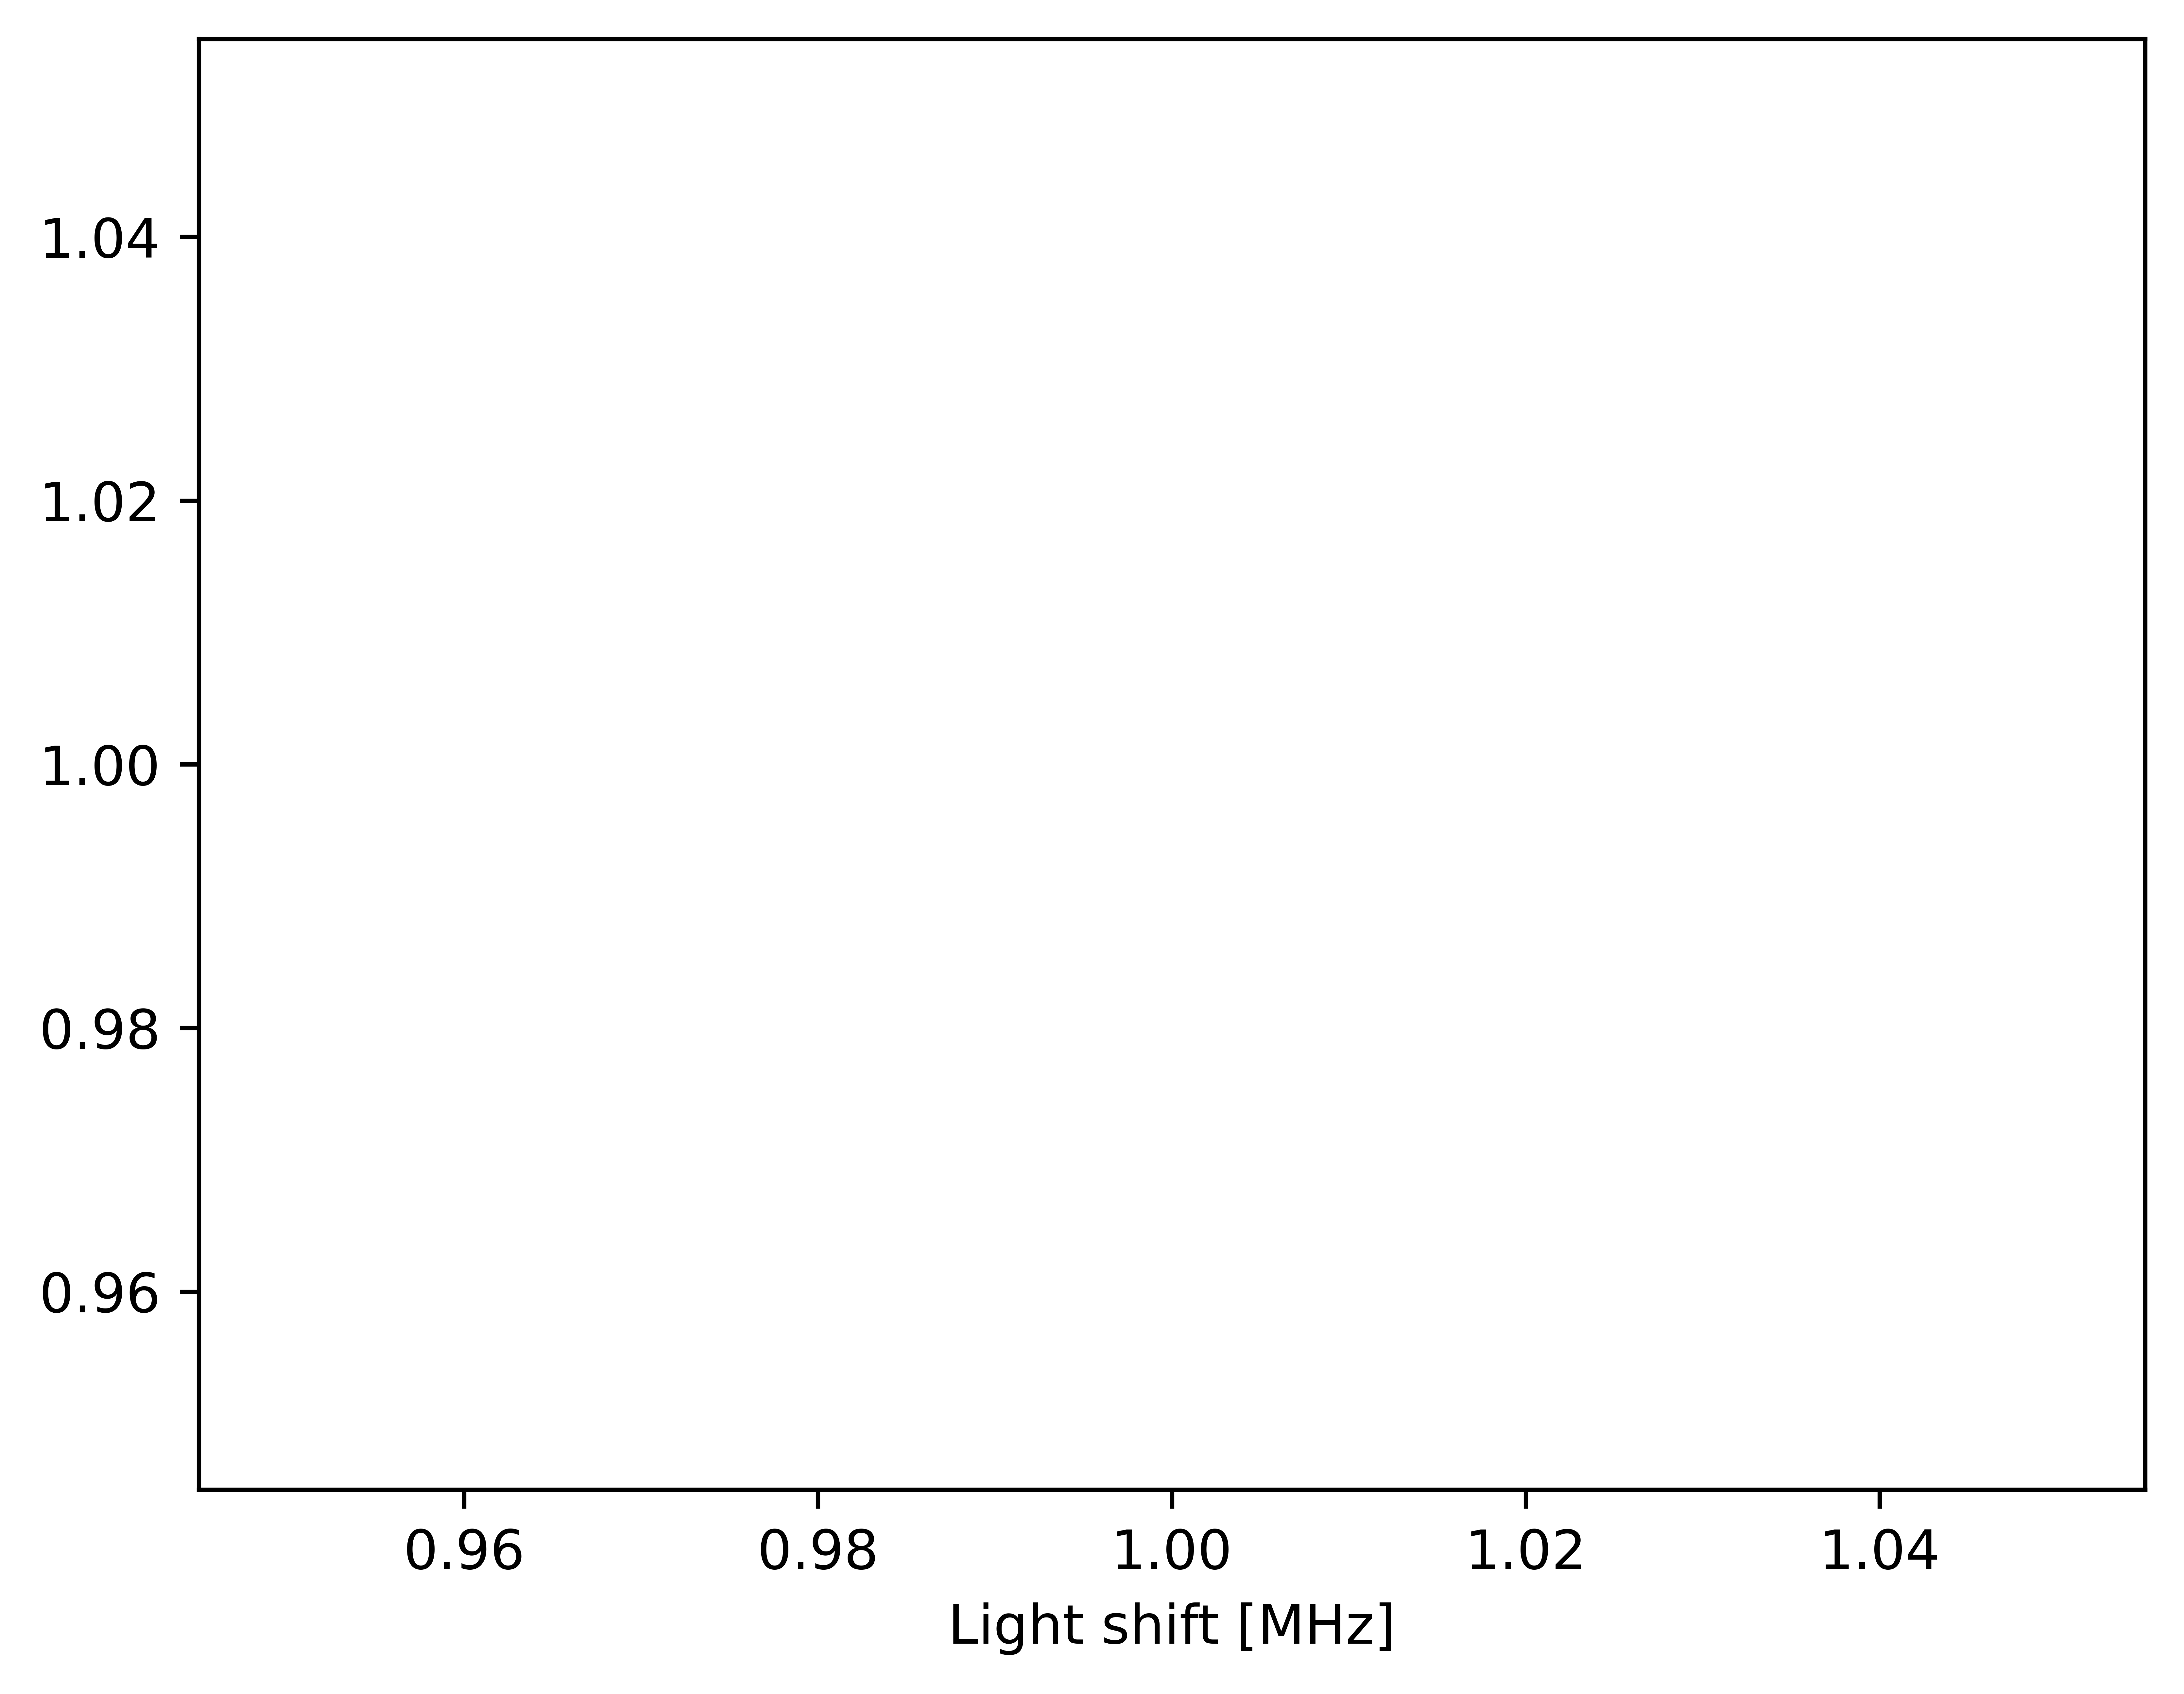

In [5]:
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
plt.plot(1,1)
plt.xlabel('Light shift [MHz]')